# Capitolul 1: Introducere în Rețele Neuronale Artificiale (ANNs)

Bun venit în lumea rețelelor neuronale! În acest capitol, vom explora conceptele fundamentale care stau la baza uneia dintre cele mai puternice ramuri ale inteligenței artificiale. Vom înțelege de ce algoritmii tradiționali nu sunt întotdeauna suficienți și cum inspirația din creierul uman a dus la crearea unor modele capabile să rezolve probleme extrem de complexe. Haideți să începem!

## De ce avem nevoie de Rețele Neuronale?

Până acum, am explorat algoritmi precum **regresia liniară** și **regresia logistică**. Aceștia sunt excelenți pentru a rezolva probleme **liniare** – adică probleme unde putem trasa o linie (sau un plan, într-un spațiu cu mai multe dimensiuni) pentru a separa datele sau a prezice o valoare.

Dar ce se întâmplă când datele noastre sunt complexe și nu pot fi separate printr-o simplă linie? Acestea sunt probleme **neliniare**. Deși unele metode tradiționale (precum SVM cu kernel sau arborii de decizie) pot aborda neliniaritatea, ele își ating limitele atunci când complexitatea datelor crește foarte mult, în special cu date nestructurate precum imagini sau text. Aici intervin **Rețelele Neuronale Artificiale (ANNs)**, care excelează în a învăța și modela relații complexe, neliniare, din seturi de date mari.

## Inspirația Biologică: Neuronul

Rețelele neuronale artificiale sunt inspirate, la nivel conceptual, de structura și funcționarea creierului uman. Creierul nostru este format din miliarde de celule nervoase interconectate, numite **neuroni**, care procesează și transmit informații prin semnale electrice.

Un neuron artificial, cunoscut și sub numele de **perceptron**, este un model matematic simplificat al unui neuron biologic. Acesta este unitatea fundamentală a unei rețele neuronale.

### Componentele unui Neuron Artificial

Un neuron artificial primește una sau mai multe **intrări** (similar cu dendritele unui neuron biologic) și produce o **ieșire** (similar cu semnalul transmis prin axon). Fiecare neuron are următoarele componente:

* **Intrări (`inputs`)**: Valorile datelor de intrare, de exemplu, caracteristicile dintr-un set de date.
* **Ponderi (`weights`)**: Fiecare intrare este asociată cu o **pondere**. Această pondere determină importanța intrării respective. O pondere mare înseamnă că intrarea are o influență mai mare asupra ieșirii neuronului. Acestea sunt valorile pe care rețeaua le va *învăța* în timpul antrenamentului.
* **Bias**: O valoare suplimentară, constantă, care este adăugată la suma intrărilor ponderate. Bias-ul permite ajustarea fină a ieșirii, similar cu termenul liber (intercept) dintr-o ecuație liniară. Acesta ajută modelul să se potrivească mai bine datelor.
* **Suma Ponderată**: Neuronul calculează o sumă a tuturor intrărilor, fiecare înmulțită cu ponderea sa, la care se adaugă bias-ul. Formula este: $z = (intrare_1 \times pondere_1) + (intrare_2 \times pondere_2) + ... + bias$.
* **Funcția de Activare**: Suma ponderată ($z$) este apoi trecută printr-o **funcție de activare**. Această funcție decide dacă neuronul ar trebui să se "activeze" (adică să transmită un semnal) și ce valoare ar trebui să aibă acest semnal. Funcțiile de activare introduc neliniaritate în model, permițându-i să învețe relații complexe.

In [1]:
# Exemplu 1: Calculul sumei ponderate pentru un neuron cu 3 intrări

# Date de intrare (ex: caracteristicile unei flori)
intrari = [2.5, 1.8, 0.5]

# Ponderi (învățate de rețea în timpul antrenamentului)
ponderi = [0.7, -0.5, 1.2]

# Bias
bias = -0.3

# Calculul sumei ponderate: z = (x1*w1 + x2*w2 + x3*w3) + bias
suma_ponderata = (intrari[0] * ponderi[0]) + (intrari[1] * ponderi[1]) + (intrari[2] * ponderi[2]) + bias

print(f"Suma ponderată (z) este: {suma_ponderata}")

# OBS.: Această sumă ponderată este valoarea pe care o primește funcția de
# activare. Ponderile și bias-ul sunt parametrii pe care rețeaua îi ajustează
# pentru a minimiza eroarea predicțiilor.

Suma ponderată (z) este: 1.15


In [ ]:
# __EXERCIȚIU__
# Se dă un neuron artificial cu 2 intrări.
# Intrările au valorile 4.2 și 3.1.
# Ponderile corespunzătoare sunt -0.2 și 0.8.
# Bias-ul este 0.5.
# Calculați și afișați suma ponderată (z) pentru acest neuron.

intrare_1 = 4.2
intrare_2 = 3.1

pondere_1 = -0.2
pondere_2 = 0.8

bias_neuron = 0.5

z = # ...

___

# Capitolul 2: Arhitectura unei Rețele Neuronale

Un singur neuron poate realiza doar o clasificare liniară simplă. Adevărata putere a rețelelor neuronale vine din combinarea mai multor neuroni în straturi interconectate. În acest capitol, vom explora arhitectura standard a unei rețele, vom înțelege rolul fiecărui tip de strat și vom aprofunda importanța funcțiilor de activare.

## Straturile unei Rețele (Layers)

O rețea neuronală este organizată în straturi succesive de neuroni. O rețea tipică are trei tipuri de straturi:

1.  **Stratul de Intrare (`Input Layer`)**: Acesta este primul strat al rețelei. *Nu conține neuroni care procesează datele*, ci pur și simplu preia datele brute de intrare și le transmite mai departe. Numărul de "noduri" din acest strat este egal cu numărul de caracteristici (**features**) din setul nostru de date. De exemplu, dacă avem un set de date cu 10 coloane (caracteristici), stratul de intrare va avea 10 noduri.

2.  **Straturile Ascunse (`Hidden Layers`)**: Acestea sunt straturile aflate între stratul de intrare și cel de ieșire. Aici are loc cea mai mare parte a procesării. Fiecare neuron dintr-un strat ascuns primește ca intrări ieșirile de la toți neuronii din stratul anterior. Rolul lor este să detecteze tipare (**patterns**) și să extragă caracteristici din ce în ce mai complexe din date. O rețea poate avea unul sau mai multe straturi ascunse. Rețelele cu mai multe straturi ascunse sunt numite **rețele neuronale profunde** (**deep neural networks**), de unde și termenul **Deep Learning**.

3.  **Stratul de Ieșire (`Output Layer`)**: Acesta este ultimul strat al rețelei și produce rezultatul final. Numărul de neuroni din acest strat depinde de tipul problemei:
    * Pentru **regresie** (prezicerea unei valori continue, ex: prețul unei case), stratul de ieșire are de obicei **un singur neuron**.
    * Pentru **clasificare binară** (prezicerea uneia din două clase, ex: spam/non-spam), are **un singur neuron** (care folosește o funcție de activare Sigmoid).
    * Pentru **clasificare multi-clasă** (prezicerea uneia din mai multe clase, ex: recunoașterea cifrelor 0-9), are **un neuron pentru fiecare clasă** (folosind o funcție de activare Softmax).

## Propagarea Înainte (Forward Propagation)

Procesul prin care datele de intrare traversează rețeaua de la stratul de intrare, prin straturile ascunse, până la stratul de ieșire pentru a genera o predicție se numește **propagare înainte**. Fluxul este unidirectional: fiecare strat primește date de la stratul anterior și le trimite către stratul următor.

## Funcții de Activare

După cum am menționat, funcțiile de activare sunt esențiale pentru a introduce **nonliniaritate** în model. Fără ele, o rețea neuronală, indiferent de câte straturi ar avea, ar fi echivalentă cu un model liniar (ca regresia liniară), deoarece compunerea mai multor transformări liniare este tot o transformare liniară. Neliniaritatea este cea care permite rețelei să învețe relații complexe.

Există mai multe tipuri de funcții de activare, fiecare cu proprietățile sale.

### Funcția Sigmoid

Funcția Sigmoid transformă orice valoare de intrare într-o valoare cuprinsă în intervalul **(0, 1)**. Este adesea folosită în stratul de ieșire pentru probleme de **clasificare binară**, unde ieșirea poate fi interpretată ca o probabilitate.

In [3]:
# Exemplu 1: Funcția Sigmoid
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

suma_ponderata_1 = -2.5
suma_ponderata_2 = 0
suma_ponderata_3 = 3.0

print(f"Sigmoid(-2.5) = {sigmoid(suma_ponderata_1)}")
print(f"Sigmoid(0) = {sigmoid(suma_ponderata_2)}")
print(f"Sigmoid(3.0) = {sigmoid(suma_ponderata_3)}")

# OBS.: Valorile de intrare negative sunt mapate aproape de 0, cele pozitive aproape de 1, iar 0 este mapat la 0.5.

Sigmoid(-2.5) = 0.07585818002124355
Sigmoid(0) = 0.5
Sigmoid(3.0) = 0.9525741268224334


### Funcția de Activare ReLU (Rectified Linear Unit)

ReLU este cea mai populară funcție de activare pentru straturile ascunse. Este foarte simplă:
* Dacă intrarea este **pozitivă**, ieșirea este egală cu intrarea.
* Dacă intrarea este **negativă**, ieșirea este **0**.

Formula este: $f(z) = max(0, z)$. Este eficientă din punct de vedere computațional și ajută la atenuarea unor probleme în timpul antrenamentului.

In [4]:
# Exemplu 2: Funcția ReLU

def relu(z):
    return np.maximum(0, z)

suma_ponderata_1 = -5.0
suma_ponderata_2 = -0.1
suma_ponderata_3 = 4.2

print(f"ReLU(-5.0) = {relu(suma_ponderata_1)}")
print(f"ReLU(-0.1) = {relu(suma_ponderata_2)}")
print(f"ReLU(4.2) = {relu(suma_ponderata_3)}")

# OBS.: ReLU "taie" toate valorile negative și le transformă în 0.
# Această simplitate o face foarte rapidă și eficientă în majoritatea cazurilor
# pentru straturile ascunse.

ReLU(-5.0) = 0.0
ReLU(-0.1) = 0.0
ReLU(4.2) = 4.2


In [ ]:
# __EXERCIȚIU__
# Se dă o listă de sume ponderate: [-3.3, 0.0, 5.1, -0.8].
# Aplicați funcția ReLU pe fiecare element al listei și afișați rezultatele.




# HINT: Puteți folosi o buclă `for` sau, mai simplu, puteți converti lista
# într-un array NumPy și să aplicați funcția `relu` direct pe array.

### Funcția Softmax

Softmax este o generalizare a funcției Sigmoid și este folosită exclusiv în **stratul de ieșire** pentru probleme de **clasificare multi-clasă**. Ea preia un vector de valori (numite **logits**) și le transformă într-un vector de probabilități, unde suma tuturor probabilităților este **1**.

In [ ]:
# Exemplu 3: Funcția Softmax

def softmax(logits):
    exponentials = np.exp(logits)
    return exponentials / np.sum(exponentials)

# Ieșirile brute (logits) de la ultimul strat pentru 3 clase (ex: pisică, câine, pasăre)
valori_brute = [2.0, 1.0, 0.1]

probabilitati = softmax(valori_brute)

print(f"Valori brute: {valori_brute}")
print(f"Probabilități: {probabilitati}")
print(f"Suma probabilităților: {np.sum(probabilitati)}")

# OBS.: Clasa cu cea mai mare valoare brută (2.0) a primit cea mai mare
# probabilitate (aprox. 0.7). Suma tuturor probabilităților este 1, permițând
# interpretarea rezultatului ca o distribuție de probabilitate.

Valori brute: [2.0, 1.0, 0.1]
Probabilități: [0.65900114 0.24243297 0.09856589]
Suma probabilităților: 1.0


In [ ]:
# __EXERCIȚIU__
# O rețea neuronală încearcă să clasifice o imagine într-una din patru
# categorii: 'mașină', 'autobuz', 'bicicletă', 'motocicletă'.
# Ieșirile brute (logits) de la ultimul strat pentru o anumită imagine sunt:
# [1.5, 3.2, 0.5, 2.1].
# Aplicați funcția softmax pe aceste valori pentru a obține probabilitățile
# pentru fiecare clasă. Afișați probabilitățile.


___

# Capitolul 3: Antrenarea unei Rețele Neuronale - Concepte Cheie

Am văzut cum este structurată o rețea și cum circulă datele prin ea. Dar cum *învață* rețeaua? Procesul de învățare (antrenare) constă în ajustarea sistematică a **ponderilor** și **bias-urilor** pentru a face predicții cât mai corecte. Pentru a controla acest proces, folosim anumiți **hiperparametri** – setări pe care le configurăm noi, programatorii, înainte de a începe antrenamentul.

## Hiperparametrii

Hiperparametrii sunt "butoanele" pe care le putem roti pentru a regla comportamentul de învățare al modelului. Alegerea lor corectă este crucială pentru performanța rețelei.

### Epoci (Epochs)
O **epocă** reprezintă o trecere completă a întregului set de date de antrenament prin rețeaua neuronală (atât propagare înainte, cât și ajustarea ponderilor). De obicei, o singură epocă nu este suficientă pentru ca rețeaua să învețe. Modelul este antrenat pe parcursul mai multor epoci, permițându-i să-și îmbunătățească treptat performanța.

### Loturi (Batches)
De cele mai multe ori, seturile de date sunt prea mari pentru a fi procesate integral într-un singur pas, din cauza limitărilor de memorie. Soluția este să împărțim setul de date în bucăți mai mici, numite **loturi** (**batches**). Rețeaua procesează un lot, își ajustează ponderile, apoi trece la următorul lot. Când toate loturile au fost procesate, s-a încheiat o epocă.

* **Batch Size**: Numărul de exemple de date dintr-un singur lot.
* **Iterații**: O iterație reprezintă procesarea unui singur lot. Numărul de iterații pe epocă este egal cu `(numărul total de exemple) / (batch size)`.

In [ ]:
# Exemplu 1: Calculul numărului de iterații

nr_total_exemple = 2000
batch_size = 50

nr_iteratii_pe_epoca = nr_total_exemple / batch_size

print(f"Cu {nr_total_exemple} de exemple și un batch size de {batch_size}, o epocă va avea {int(nr_iteratii_pe_epoca)} de iterații.")

# OBS.: Ponderile rețelei sunt actualizate după fiecare iterație (adică după
# fiecare lot), nu doar la finalul epocii.
# Dacă avem 100 de epoci, ponderile vor fi actualizate de 100 * 40 = 4000 de
# ori în total.

Cu 2000 de exemple și un batch size de 50, o epocă va avea 40 de iterații.


In [ ]:
# __EXERCIȚIU__
# Avem un set de date cu 15.000 de imagini. Dorim să antrenăm o rețea neuronală
# folosind un batch size de 128.
# Calculați câte iterații vor fi necesare pentru a parcurge o singură epocă.

# HINT: Împărțiți numărul total de imagini la dimensiunea lotului.
# Rezultatul s-ar putea să nu fie un număr întreg. Folosiți `np.ceil()` pentru
# a rotunji în sus, deoarece ultimul lot poate fi mai mic decât batch size-ul.

nr_imagini = 15000
batch_size_imagini = 128


### Rata de Învățare (Learning Rate)

**Rata de învățare** este poate cel mai important hiperparametru. Acesta controlează cât de mult se modifică ponderile rețelei la fiecare actualizare. Poate fi văzut ca "dimensiunea pasului" pe care modelul îl face în direcția minimizării erorii.

* O rată de învățare **prea mare** poate face ca modelul să "sară" peste soluția optimă și să nu conveargă niciodată.
* O rată de învățare **prea mică** va face ca antrenamentul să fie foarte lent și s-ar putea bloca într-un minim local, care nu este optim.

___

# Capitolul 4: Construirea Rețelelor Neuronale cu Keras

Acum că am acoperit teoria, este timpul să punem totul în practică. Vom folosi **Keras**, o bibliotecă de Deep Learning extrem de populară și prietenoasă, care rulează peste TensorFlow. Keras ne permite să construim și să antrenăm rețele neuronale complexe cu doar câteva linii de cod.

## Etapele construirii unui model în Keras

Construirea unui model în Keras urmează, de obicei, 3 pași principali:

1.  **Definirea modelului**: Se specifică arhitectura rețelei, adică straturile și ordinea lor. Cel mai comun mod este folosind `Sequential API`, unde straturile sunt adăugate unul după altul, ca într-o listă.
2.  **Compilarea modelului**: Se configurează procesul de învățare. Aici specificăm:
    * **Optimizatorul (`optimizer`)**: Algoritmul care va actualiza ponderile (ex: `Adam`, `SGD`). `Adam` este o alegere excelentă în majoritatea cazurilor.
    * **Funcția de pierdere (`loss function`)**: Măsura pe care modelul încearcă să o minimizeze (ex: `mean_squared_error` pentru regresie, `binary_crossentropy` pentru clasificare binară).
    * **Metrica (`metrics`)**: Măsuri suplimentare pentru a evalua performanța modelului (ex: `accuracy` pentru clasificare).
3.  **Antrenarea modelului**: Se apelează metoda `.fit()` pentru a antrena modelul pe datele de antrenament, specificând numărul de epoci și dimensiunea lotului.

### Exemplu 1: Regresie Liniară cu Keras

Vom începe cu cel mai simplu caz: un model care învață o relație liniară. Vom crea o rețea cu un singur strat `Dense` și fără funcție de activare. Vom vedea că acest model se comportă exact ca o regresie liniară clasică.

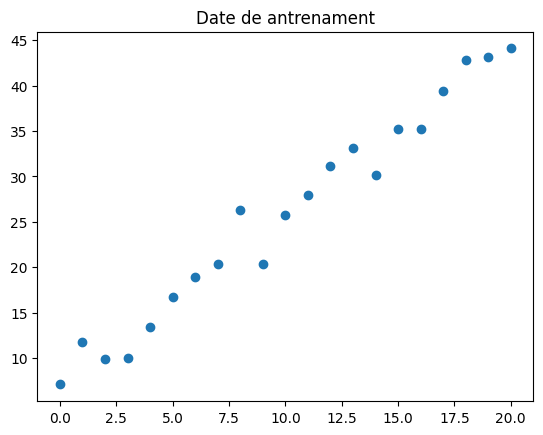

Antrenament finalizat!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


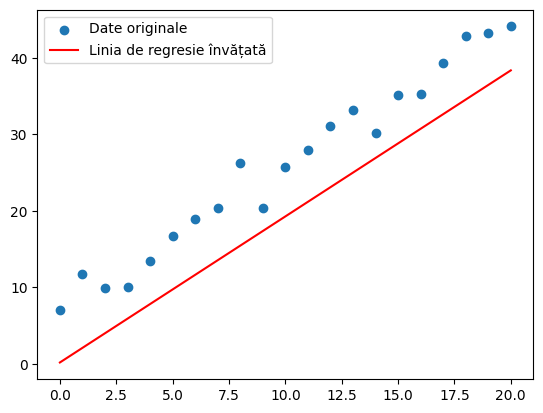

In [9]:
# Exemplu 1: Construirea unui model de regresie liniară
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# 1. Pregătirea datelor (sintetice)
x_train = np.linspace(0, 20, 21)
y_train = 2 * x_train + 5 + np.random.normal(0, 2, 21) # y = 2x + 5 + zgomot

plt.scatter(x_train, y_train)
plt.title("Date de antrenament")
plt.show()

# 2. Definirea modelului
model_liniar = keras.Sequential([
    # Un singur strat dens cu o singură ieșire. input_shape specifică forma
    # unei singure mostre de date (un singur număr).
    Dense(units=1, input_shape=[1])
])

# 3. Compilarea modelului
model_liniar.compile(optimizer='adam', loss='mean_squared_error')

# 4. Antrenarea modelului
history = model_liniar.fit(x_train, y_train, epochs=200, verbose=0)
# verbose=0 pentru a nu afișa progresul

print("Antrenament finalizat!")

# Afișarea rezultatului
plt.scatter(x_train, y_train, label='Date originale')
plt.plot(x_train, model_liniar.predict(x_train), color='red', label='Linia de regresie învățată')
plt.legend()
plt.show()

# OBS.: O rețea neuronală cu un singur strat `Dense` și fără funcție de
# activare (sau cu activare liniară) este matematic echivalentă cu o regresie
# liniară. Parametrii pe care i-a învățat (ponderea și bias-ul) corespund
# pantei și termenului liber.

In [ ]:
# __EXERCIȚIU__
# Folosind datele și modelul din exemplul anterior, re-antrenați modelul
# folosind doar 50 de epoci.
# Apoi, re-antrenați-l din nou folosind 1000 de epoci.
# Comparați vizual linia de regresie învățată în fiecare caz. Ce observați?

### Exemplu 2: Regresie Neliniară cu Keras

Acum, să vedem cum Keras poate modela o relație neliniară. Vom adăuga un strat ascuns cu funcția de activare **ReLU**. Acest strat suplimentar și neliniaritatea introdusă de `relu` vor permite modelului să învețe o curbă, nu doar o linie.

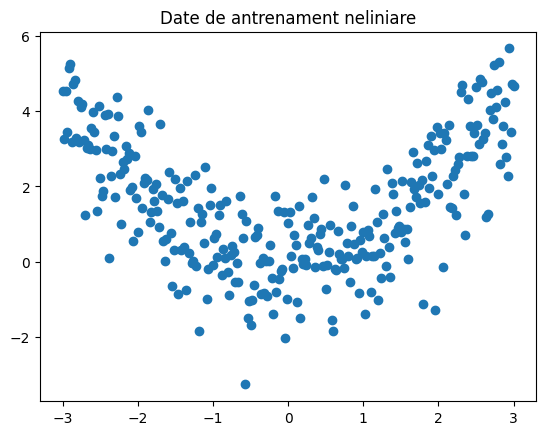

Antrenament finalizat!
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


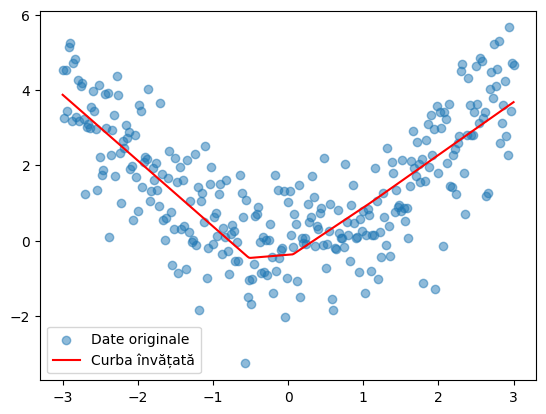

In [12]:
# Exemplu 2: Construirea unui model de regresie neliniară

# 1. Pregătirea datelor (sintetice, o relație pătratică)
x_train_nl = tf.linspace(-3, 3, 301)
y_train_nl = 0.5 * tf.cast(x_train_nl, tf.float32)**2 + tf.random.normal(shape=[301]) # y = 0.5*x^2 + zgomot

plt.scatter(x_train_nl, y_train_nl)
plt.title("Date de antrenament neliniare")
plt.show()

# 2. Definirea modelului
model_neliniar = keras.Sequential([
    # Stratul ascuns cu 10 neuroni și activare ReLU
    Dense(units=10, input_shape=[1], activation='relu'),
    # Stratul de ieșire cu un singur neuron
    Dense(units=1)
])

# 3. Compilarea modelului
model_neliniar.compile(optimizer='adam', loss='mean_squared_error')

# 4. Antrenarea modelului
history_nl = model_neliniar.fit(x_train_nl, y_train_nl, epochs=300, verbose=0)

print("Antrenament finalizat!")

# Afișarea rezultatului
plt.scatter(x_train_nl, y_train_nl, label='Date originale', alpha=0.5)
plt.plot(x_train_nl, model_neliniar.predict(x_train_nl), color='red', label='Curba învățată')
plt.legend()
plt.show()

# OBS.: Adăugarea stratului ascuns cu activare `relu` a permis modelului să aproximeze o funcție neliniară (parabola).
# Acest lucru ar fi fost imposibil pentru modelul liniar din exemplul anterior.

In [ ]:
# __EXERCIȚIU__
# Experimentați cu arhitectura modelului neliniar.
# 1. Creați și antrenați un model cu un strat ascuns care are 50 de neuroni
# (`units=50`).
# 2. Creați și antrenați un model cu două straturi ascunse, fiecare cu 10
# neuroni.
# Comparați vizual rezultatele. Care model pare să se potrivească mai bine
# datelor?


# Capitolul 5: Exemple Avansate cu Keras

În capitolele anterioare am pus bazele teoretice și practice ale rețelelor neuronale. Acum, vom aprofunda cunoștințele prin exemple mai complexe, care oglindesc mai bine problemele întâlnite în practică. Vom parcurge pas cu pas trei tipuri de probleme: **regresie**, **clasificare binară** și **clasificare multi-clasă**, folosind seturi de date reale din `scikit-learn`.

Acest capitol este conceput pentru a vă oferi exemplele necesare pentru a rezolva cu încredere exercițiile finale din capitolul 5. Vom urma un flux de lucru standard pentru fiecare problemă:
1.  **Încărcarea și Pregătirea Datelor**: Inclusiv împărțirea în seturi de antrenament/test și scalarea caracteristicilor.
2.  **Definirea și Compilarea Modelului**: Alegerea arhitecturii, a funcțiilor de activare și a parametrilor de antrenament.
3.  **Antrenarea și Evaluarea Modelului**: Procesul de învățare și măsurarea performanței pe date noi.

## Exemplu Avansat 1: Regresie - Prezicerea Progresiei Diabetului

Pentru acest exemplu, vom folosi setul de date **Diabetes** din `scikit-learn`. Problema constă în prezicerea progresiei cantitative a diabetului la un an după o serie de măsurători inițiale (vârstă, sex, indice de masă corporală, tensiune arterială și șase măsurători ale serului sanguin). Deoarece ținta (progresia bolii) este o valoare numerică, continuă, aceasta este o problemă de **regresie**.

In [13]:
# Pasul 1: Încărcarea și Pregătirea Datelor
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Încărcăm datele
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Împărțim datele în seturi de antrenament și test
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, test_size=0.2, random_state=42)

# Scalăm caracteristicile
scaler_d = StandardScaler()
X_train_d = scaler_d.fit_transform(X_train_d)
X_test_d = scaler_d.transform(X_test_d)

print(f"Setul de date pentru diabet are {X_train_d.shape[1]} caracteristici.")

# OBS.: Scalarea datelor este un pas critic în pregătirea datelor pentru
# rețelele neuronale.
# Deoarece caracteristicile (vârstă, tensiune etc.) au unități de măsură și
# intervale de valori diferite, scalarea le aduce pe toate la o scară comună
# (medie 0, deviație standard 1). Acest lucru ajută algoritmul de optimizare să
# conveargă mai rapid și mai stabil.

Setul de date pentru diabet are 10 caracteristici.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluarea modelului pe setul de test:
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4847.6387


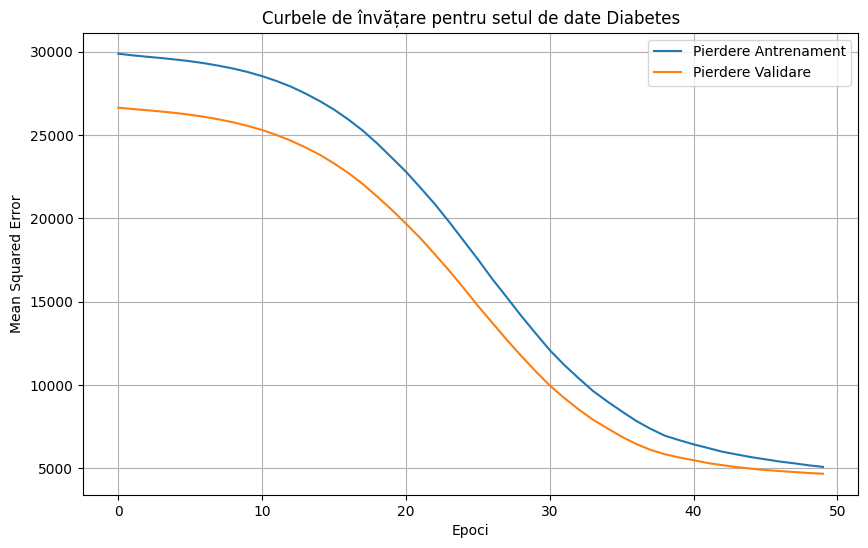

In [14]:
# Exemplu 1.1: Construirea, antrenarea și evaluarea modelului de regresie

# 2. Definirea și Compilarea Modelului
model_diabetes = keras.Sequential([
    # Primul strat ascuns cu 32 de neuroni. input_shape trebuie să corespundă
    # numărului de caracteristici.
    Dense(units=32, activation='relu', input_shape=[X_train_d.shape[1]]),
    # Al doilea strat ascuns cu 16 de neuroni.
    Dense(units=16, activation='relu'),
    # Stratul de ieșire are un singur neuron pentru a prezice valoarea continuă.
    Dense(units=1)
])

model_diabetes.compile(optimizer='adam', loss='mean_squared_error')

# 3. Antrenarea și Evaluarea Modelului
history_diabetes = model_diabetes.fit(X_train_d, y_train_d, epochs=50, validation_data=(X_test_d, y_test_d), verbose=0)

print("Evaluarea modelului pe setul de test:")
model_diabetes.evaluate(X_test_d, y_test_d)

# Vizualizarea curbelor de învățare
plt.figure(figsize=(10, 6))
plt.plot(history_diabetes.history['loss'], label='Pierdere Antrenament')
plt.plot(history_diabetes.history['val_loss'], label='Pierdere Validare')
plt.title('Curbele de învățare pentru setul de date Diabetes')
plt.xlabel('Epoci')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

# OBS.: Urmărind curbele de învățare, putem observa cum performanța modelului
# de antrenament continuă să scadă, este un semn de overfitting.
# se îmbunătățește (pierderea scade) atât pe datele de antrenament, cât și pe
# cele de validare. Dacă pierderea de validare începe să crească în timp ce cea
# de antrenament continuă să scadă, este un semn de overfitting.

In [ ]:
# __EXERCIȚIU__
# Arhitectura unei rețele neuronale este un hiperparametru important.
# Modificați modelul `model_diabetes` adăugând un al treilea strat ascuns cu 8
# neuroni (`units=8`) și activare 'relu'.
# Plasați acest strat nou între cel de-al doilea strat ascuns și stratul de
# ieșire. Re-compilați și re-antrenați modelul pentru 50 de epoci.
# Comparați eroarea (MSE) pe setul de test cu cea a modelului original.
# S-a îmbunătățit performanța?



# HINT: O nouă arhitectură necesită o nouă definire a modelului `keras.Sequential([...])`.

## Exemplu Avansat 2: Clasificare Binară - Diagnosticarea Cancerului Mamar

Acum vom aborda o problemă de **clasificare binară** folosind setul de date **Breast Cancer Wisconsin**. Scopul este de a clasifica o tumoră ca fiind fie **malignă** (clasa 0), fie **benignă** (clasa 1), pe baza unor caracteristici măsurate ale nucleilor celulari.

In [15]:
# Pasul 1: Încărcarea și Pregătirea Datelor
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler_c = StandardScaler()
X_train_c = scaler_c.fit_transform(X_train_c)
X_test_c = scaler_c.transform(X_test_c)

print(f"Setul de date pentru cancer mamar are {X_train_c.shape[1]} caracteristici.")
print(f"Clasele sunt: {cancer.target_names}")

Setul de date pentru cancer mamar are 30 caracteristici.
Clasele sunt: ['malignant' 'benign']


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluarea modelului pe setul de test:
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9470 - loss: 0.1243 
Acuratețea pe setul de test: 95.61%


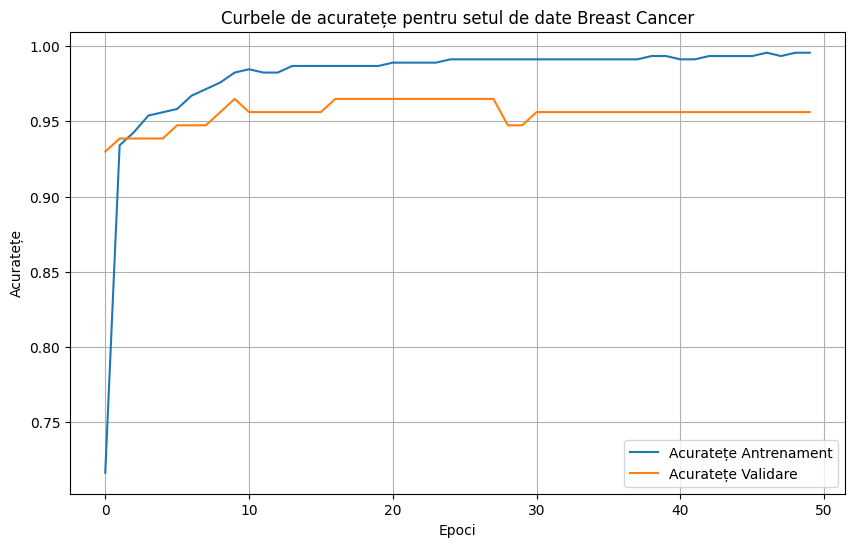

In [16]:
# Exemplu 2.1: Construirea, antrenarea și evaluarea modelului de clasificare binară

# 2. Definirea și Compilarea Modelului
model_cancer = keras.Sequential([
    Dense(units=32, activation='relu', input_shape=[X_train_c.shape[1]]),
    Dense(units=16, activation='relu'),
    # Pentru clasificare binară, stratul de ieșire are 1 neuron și activare 'sigmoid'.
    Dense(units=1, activation='sigmoid')
])

# OBS.: Funcția 'sigmoid' produce o ieșire între 0 și 1, care poate fi
# interpretată ca probabilitatea ca o mostră să aparțină clasei pozitive
# (în acest caz, clasa 1 - benignă).

model_cancer.compile(
    optimizer='adam',
    loss='binary_crossentropy', # Funcția de pierdere potrivită pentru clasificare binară
    metrics=['accuracy'] # Metrica pentru a monitoriza acuratețea
)

# 3. Antrenarea și Evaluarea Modelului
history_cancer = model_cancer.fit(X_train_c, y_train_c, epochs=50, validation_data=(X_test_c, y_test_c), verbose=0)

print("Evaluarea modelului pe setul de test:")
loss, accuracy = model_cancer.evaluate(X_test_c, y_test_c)
print(f"Acuratețea pe setul de test: {accuracy*100:.2f}%")

# Vizualizarea curbelor de acuratețe
plt.figure(figsize=(10, 6))
plt.plot(history_cancer.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history_cancer.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Curbele de acuratețe pentru setul de date Breast Cancer')
plt.xlabel('Epoci')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# __EXERCIȚIU__
# Folosiți modelul antrenat (`model_cancer`) pentru a face o predicție pe prima
# mostră din setul de test (`X_test_c[0]`)
# Afișați probabilitatea prezisă. Pe baza acestei probabilități, care este
# clasa prezisă (0 - malign sau 1 - benign)?
# Comparați predicția cu eticheta reală (`y_test_c[0]`).

# HINT: Metoda `.predict()` se așteaptă la un array 2D (un lot de mostre).
# Pentru a prezice pe o singură mostră, trebuie să o transformați într-un lot
# cu un singur element, de ex: `np.array([X_test_c[0]])` sau `X_test_c[0:1]`.
# O probabilitate > 0.5 este de obicei interpretată ca o predicție pentru clasa 1.

prima_mostra = X_test_c[0:1]
eticheta_reala = y_test_c[0]


## Exemplu Avansat 3: Clasificare Multi-clasă - Recunoașterea Cifrelor Scrise de Mână

În final, vom lucra cu setul de date **Digits**, care conține imagini de 8x8 pixeli cu cifre scrise de mână (de la 0 la 9). Aceasta este o problemă de **clasificare multi-clasă**, deoarece avem 10 clase posibile.

In [17]:
# Pasul 1: Încărcarea și Pregătirea Datelor
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

X_train_dg, X_test_dg, y_train_dg, y_test_dg = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler_dg = StandardScaler()
X_train_dg = scaler_dg.fit_transform(X_train_dg)
X_test_dg = scaler_dg.transform(X_test_dg)

print(f"Setul de date pentru cifre are {X_train_dg.shape[1]} caracteristici (8x8 pixeli).")
print(f"Numărul de clase: {len(np.unique(y))}")

Setul de date pentru cifre are 64 caracteristici (8x8 pixeli).
Numărul de clase: 10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluarea modelului pe setul de test:
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9744 - loss: 0.1002 
Acuratețea pe setul de test: 97.22%


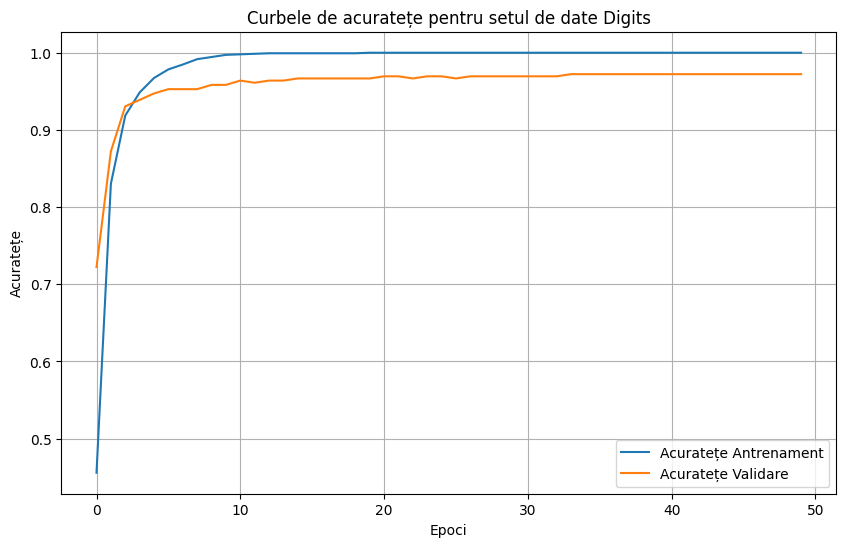

In [18]:
# Exemplu 3.1: Construirea, antrenarea și evaluarea modelului de clasificare multi-clasă

# 2. Definirea și Compilarea Modelului
model_digits = keras.Sequential([
    Dense(units=64, activation='relu', input_shape=[X_train_dg.shape[1]]),
    Dense(units=32, activation='relu'),
    # Pentru clasificare multi-clasă, stratul de ieșire are un neuron pentru fiecare clasă
    # și activarea 'softmax' pentru a produce o distribuție de probabilitate.
    Dense(units=10, activation='softmax')
])

# OBS.: Funcția 'softmax' asigură că suma ieșirilor de la toți cei 10 neuroni este 1.

model_digits.compile(
    optimizer='adam',
    # 'sparse_categorical_crossentropy' este folosită când etichetele sunt numere întregi (0, 1, ..., 9).
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 3. Antrenarea și Evaluarea Modelului
history_digits = model_digits.fit(X_train_dg, y_train_dg, epochs=50, validation_data=(X_test_dg, y_test_dg), verbose=0)

print("Evaluarea modelului pe setul de test:")
loss, accuracy = model_digits.evaluate(X_test_dg, y_test_dg)
print(f"Acuratețea pe setul de test: {accuracy*100:.2f}%")

# Vizualizarea curbelor de acuratețe
plt.figure(figsize=(10, 6))
plt.plot(history_digits.history['accuracy'], label='Acuratețe Antrenament')
plt.plot(history_digits.history['val_accuracy'], label='Acuratețe Validare')
plt.title('Curbele de acuratețe pentru setul de date Digits')
plt.xlabel('Epoci')
plt.ylabel('Acuratețe')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# __EXERCIȚIU__
# Folosiți modelul antrenat (`model_digits`) pentru a face predicții pe primele
# 5 mostre din setul de test (`X_test_dg[:5]`)
# Rezultatul va fi un array de probabilități pentru fiecare mostră.
# Folosiți `np.argmax(axis=1)` pe rezultat pentru a găsi clasa cu cea mai mare
# probabilitate pentru fiecare mostră.
# Afișați clasele prezise și comparați-le cu etichetele reale (`y_test_dg[:5]`).

# HINT: `.predict()` va returna un array de forma (5, 10), unde fiecare rând
# conține 10 probabilități.
# `np.argmax` cu `axis=1` găsește indexul valorii maxime pe fiecare rând, care
# corespunde clasei prezise.

primele_cinci = X_test_dg[:5]
etichete_reale = y_test_dg[:5]

# Capitolul 6: Este timpul pentru practică: Keras

Acum că am învățat conceptele de bază și am văzut cum să construim modele simple în Keras, este momentul să aplicăm aceste cunoștințe pe seturi de date reale. Vom aborda atât o problemă de regresie, cât și una de clasificare.

## Seturi de Date

Vom folosi două seturi de date clasice din `scikit-learn`:

1.  **California Housing**: Un set de date pentru **regresie**, unde scopul este să prezicem valoarea mediană a unei case pe baza unor caracteristici demografice și geografice.
2.  **Wine**: Un set de date pentru **clasificare multi-clasă**, unde scopul este să clasificăm un vin în una din trei categorii, pe baza compoziției sale chimice.

In [ ]:
from sklearn.datasets import fetch_california_housing, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Încărcare și pregătire date pentru regresie (California Housing)
housing = fetch_california_housing()
X_train_full_h, X_test_h, y_train_h, y_test_h = train_test_split(housing.data, housing.target, random_state=42)

# Scalarea datelor este foarte importantă pentru rețelele neuronale
scaler = StandardScaler()
X_train_h = scaler.fit_transform(X_train_full_h)
X_test_h = scaler.transform(X_test_h)

print(f"Forma datelor de antrenament (Housing): {X_train_h.shape}")

# Încărcare și pregătire date pentru clasificare (Wine)
wine = load_wine()
X_train_full_w, X_test_w, y_train_w, y_test_w = train_test_split(wine.data, wine.target, random_state=42, stratify=wine.target)

scaler_w = StandardScaler()
X_train_w = scaler_w.fit_transform(X_train_full_w)
X_test_w = scaler_w.transform(X_test_w)

print(f"Forma datelor de antrenament (Wine): {X_train_w.shape}")

## Exerciții de Regresie: California Housing

In [ ]:
# __EXERCIȚIU__
# Construiți, compilați și antrenați o rețea neuronală pentru setul de date
# California Housing.
# 1. Definiți un model `Sequential`.
# 2. Adăugați un strat ascuns cu 30 de neuroni și activare 'relu'. Nu uitați să
# specificați `input_shape`.
# 3. Adăugați un strat de ieșire cu un singur neuron (deoarece este o problemă
# de regresie).
# 4. Compilați modelul folosind optimizatorul 'adam' și funcția de pierdere
# 'mean_squared_error'.
# 5. Antrenați modelul pentru 20 de epoci pe datele de antrenament (X_train_h,
# y_train_h) și evaluați-l pe datele de test (X_test_h, y_test_h) folosind
# parametrul `validation_data`.


model_housing = keras.Sequential([

])


# Evaluarea finală a modelului
mse_test = model_housing.evaluate(X_test_h, y_test_h)
print(f"Mean Squared Error pe setul de test: {mse_test}")


# HINT: Forma de intrare (`input_shape`) trebuie să corespundă numărului de
# caracteristici din X_train_h.
# Puteți obține acest număr cu `X_train_h.shape[1]`.

## Exerciții de Clasificare: Wine

In [ ]:
# __EXERCIȚIU__
# Construiți, compilați și antrenați o rețea neuronală pentru setul de date Wine.
# Aceasta este o problemă de clasificare multi-clasă (3 clase).

# 1. Definiți un model `Sequential`.
# 2. Adăugați două straturi ascunse, ambele cu 20 de neuroni și activare 'relu'.
# 3. Adăugați stratul de ieșire. Deoarece avem 3 clase, acesta trebuie să aibă 3
# neuroni și funcția de activare 'softmax'.
# 4. Compilați modelul. Funcția de pierdere potrivită pentru clasificare
# multi-clasă cu etichete întregi (0, 1, 2) este 'sparse_categorical_crossentropy'.
#    Folosiți optimizatorul 'adam' și adăugați metrica 'accuracy'.
# 5. Antrenați modelul pentru 30 de epoci, folosind și datele de validare.

model_wine = keras.Sequential([

])


# HINT: Nu uitați `input_shape` la primul strat. Parametrul `metrics` din
# `compile` trebuie să fie o listă, ex: `metrics=['accuracy']`.

## Felicitări! Ați terminat!

Sper că v-a plăcut acest curs și că vă simțiți măcar puțin mai pregătiți pentru a săpa mai în detaliu în lumea aceasta fascinantă a inteligenței artificiale.

Mai jos, vă las câteva moduri în care mă puteți contacta, în caz de aveți întrebări, nelămuriri sau propuneri de viitor!

Vă mulțumesc de participare și vă urez baftă multă în continuare!

#### Contact

- **Nume complet**: Alexandru Jilavu
- **Nume firmă**: S.C. ASTRONET PROJECTS S.R.L.
- **Email contact**: [contact@astronetprojects.com](https://)
- **Website firmă**: [www.astronetprojects.com](https://)


## Felicitări! Ați terminat!

Sper că v-a plăcut acest curs și că vă simțiți măcar puțin mai pregătiți pentru a săpa mai în detaliu în lumea aceasta fascinantă a inteligenței artificiale.

Mai jos, vă las câteva moduri în care mă puteți contacta, în caz de aveți întrebări, nelămuriri sau propuneri de viitor!

Vă mulțumesc de participare și vă urez baftă multă în continuare!

#### Contact

- **Nume complet**: Alexandru Jilavu
- **Nume firmă**: S.C. ASTRONET PROJECTS S.R.L.
- **Email contact**: [contact@astronetprojects.com](mailto:contact@astronetprojects.com)
- **Website firmă**: [www.astronetprojects.com](https://www.astronetprojects.com)

